In [2]:
import numpy as np
from matplotlib import pyplot as plt
#import plotter as pl
import os
import csv
import sys
import json
sys.path.append('''./model''')

In [3]:
# Read phase transition inputs from file
keylist = ['m12', 'm22', 'l1', 'l2', 'lm', 'v2re', 'm1', 'm2', 'sint', 'tanb', 
           'Tc', 'lvtc1', 'lvtc2','hvtc1', 'hvtc2', 'strengthTc', 'Tn', 'lvtn1', 'lvtn2', 'hvtn1', 'hvtn2', 'strengthTn', 'alpha', 'betaH']
pt_paras = {}
for key in keylist:
    pt_paras[key] = []

dirs = ['output/scan_0wvwnr']#, 'output/scan_9', 'output/scan_10']
for d in dirs:
    '''
    for filename in os.listdir(d):
        if filename.startswith('log'):
            file_path = os.path.join(d, filename)
            with open(file_path, 'r') as f:
                try:
                    line = f.readlines()[-1]
                    data = line.split()               
                    data[0] = data[0].split('[')[1]
                    data[-1] = data[-1].split(']')[0]
                except:
                    continue
                try:
                    i_vt = keylist.index('strengthTc')
                    if float(data[i_vt].split(',')[0]) > 0:
                        print(filename)
                except:
                    pass
                for i, key in enumerate(keylist):
                    if i < len(data):
                        p = float(data[i].split(',')[0])
                        pt_paras[key].append(p)
                    else:
                        pt_paras[key].append(0)
                    
    '''
    csv_file = d + '/Z2out.csv'  # Replace 'data.csv' with your actual file path
    with open(csv_file, mode='r', newline='') as file:
        reader = csv.reader(file)

        for row in reader:
            for ind, key in enumerate(keylist):
                if ind < len(row):
                    pt_paras[key].append(float(row[ind]))
                else:
                    pt_paras[key].append(0)

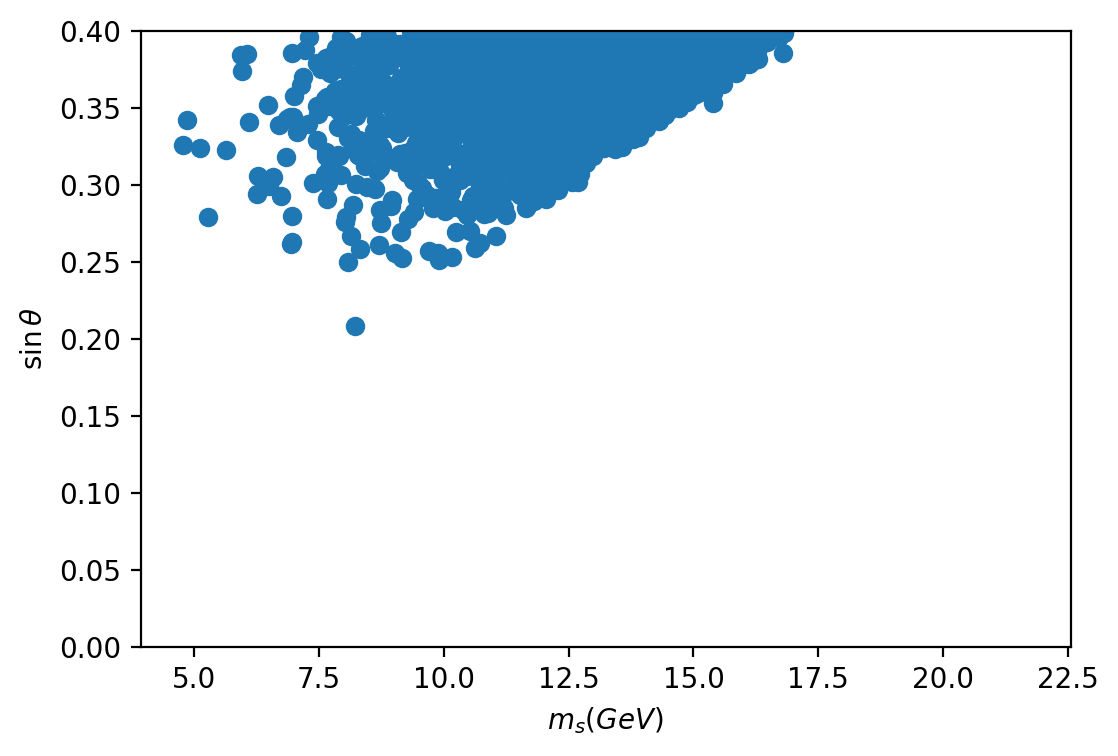

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
ax.scatter(pt_paras['m2'], pt_paras['sint'])
ax.set_xlabel(r'$m_s(GeV)$')
ax.set_ylabel(r'$\sin\theta$')
ax.set_ylim(0.0, 0.4)
fig.savefig(dirs[0] + '/ms_sint.png')

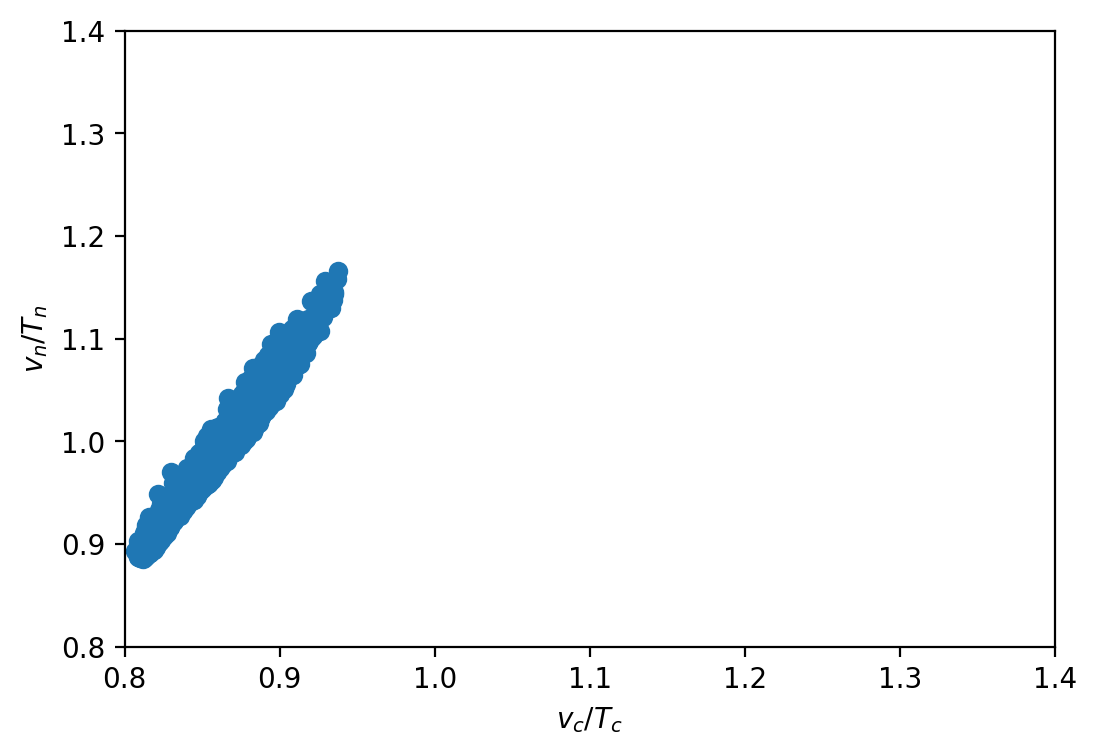

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
ax.scatter(pt_paras['strengthTc'], pt_paras['strengthTn'])
ax.set_xlabel(r'$v_c/T_c$')
ax.set_ylabel(r'$v_n/T_n$')
ax.set_xlim(0.8, 1.4)
ax.set_ylim(0.8, 1.4)
fig.savefig(dirs[0] + '/supercooling.png')

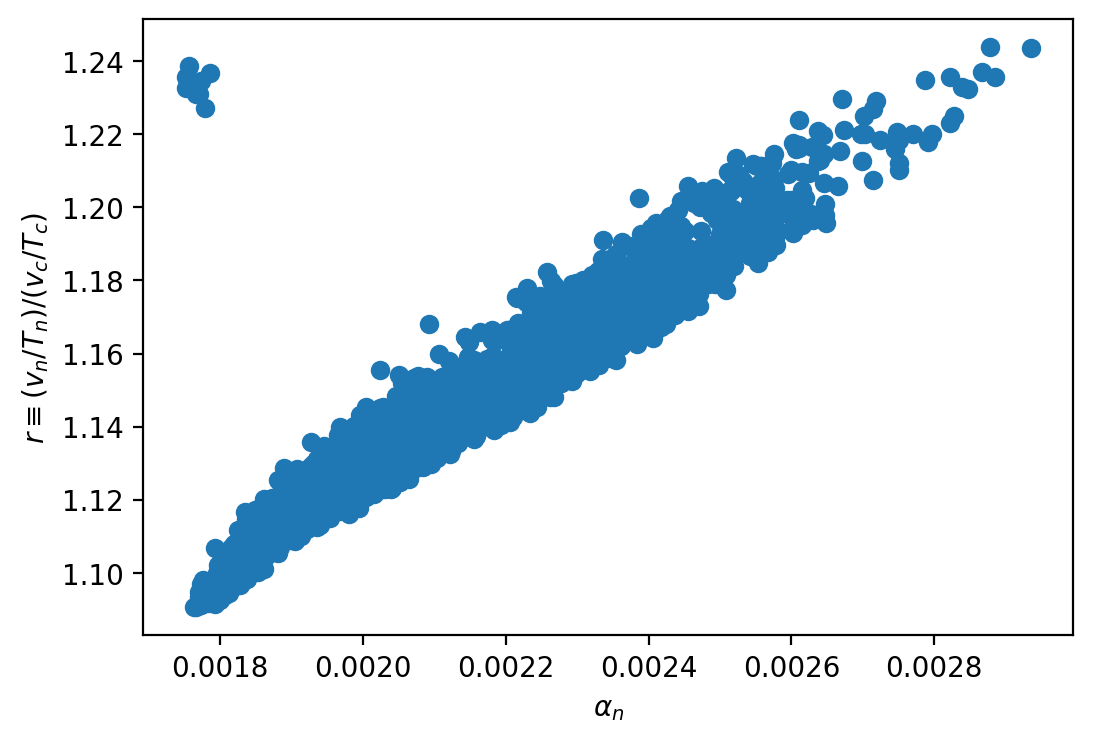

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
rlist = []
for i, vctc in enumerate(pt_paras['strengthTc']):
    rlist.append(pt_paras['strengthTn'][i] / vctc)
ax.scatter(pt_paras['alpha'], rlist)
ax.set_xlabel(r'$\alpha_n$')
ax.set_ylabel(r'$r\equiv(v_n/T_n)/(v_c/T_c)$')
fig.savefig(dirs[0] + '/alpha_r.png')

Text(0.5, 0, '$\\tilde{\\lambda}_h$')

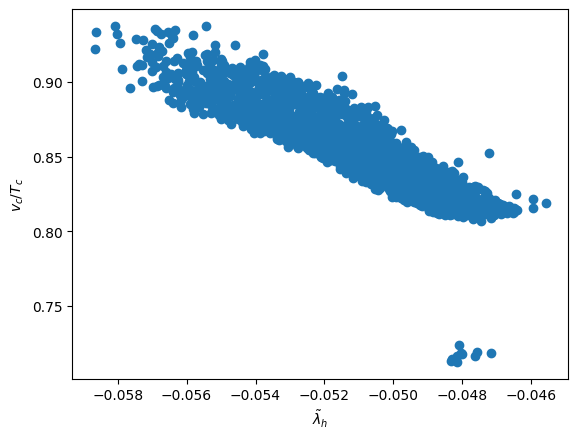

In [10]:
lhtilde = []
vovert = []
for i in range(len(pt_paras['m12'])):
    if pt_paras['strengthTc'][i] > 0:
        lhtilde.append(pt_paras['l1'][i] - pt_paras['lm'][i]**2/(4*pt_paras['l2'][i]))
        vovert.append(pt_paras['strengthTc'][i])
plt.scatter(lhtilde, vovert)
plt.ylabel(r'$v_c/T_c$')
plt.xlabel(r'$\tilde{\lambda}_h$')

Model initialized.
μh2 = 9791.58711
μs2 = -1559.1879
λh = 0.14748925
λs = 0.0039916
λsh = 0.0447158


Text(0.5, 0, 's')

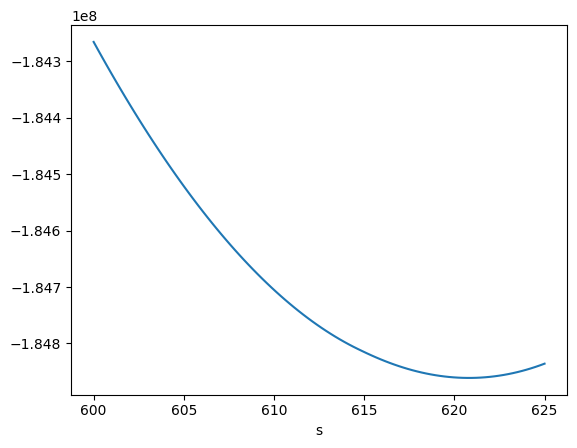

In [13]:
import Z2sb_model as m
m12 = 9791.58711
m22 = -1559.1879
l1 = 0.14748925
l2 = 0.0039916
lm = 0.0447158
mod = m.model(m12, m22, l1, l2, lm, 91.1876**2)
hrange = np.linspace(600., 625., 100)
V = []
for h in hrange:
    V.append(mod.Vtot(np.array([0, h]), T=57.77))
plt.plot(hrange, V)
plt.xlabel('s')

Text(0, 0.5, '$w_{input}$')

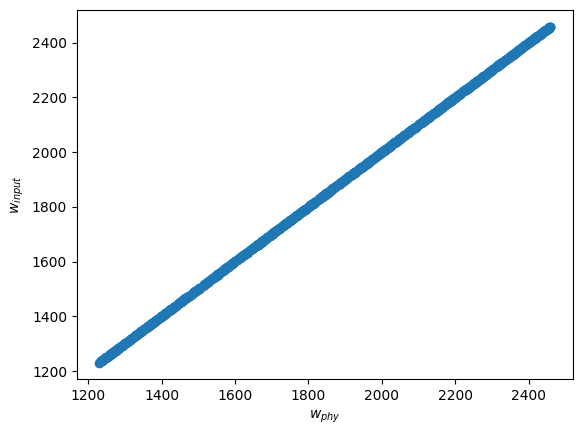

In [7]:
plt.scatter(wphy, win)
plt.xlabel(r"$w_{phy}$")
plt.ylabel(r'$w_{input}$')

In [22]:
lhtilde_tree, lhtilde_cw = [], []
for i in range(len(pt_paras['m12'])):
    mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i],
              pt_paras['lm'][i], pt_paras['v2re'][i])
    lhtilde_tree.append(pt_paras['l1'][i] - 
                        pt_paras['lm'][i]**2/(4*pt_paras['l2'][i]))
    ct = mod.counterterm([0, 0])
    l1cw = pt_paras['l1'][i] + mod.delta_lh
    l2cw = pt_paras['l2'][i] + mod.delta_ls
    lmcw = pt_paras['lm'][i] + mod.delta_lhs
    lhtilde_cw.append(l1cw - lmcw**2/(4*l2cw))

Model initialized.
μh2 = 13439.40275938507
μs2 = -587.2839188414887
λh = 0.12804511344595132
λs = 0.00012009598996467075
λsh = 0.0027041453292094507
Model initialized.
μh2 = 9037.600633484646
μs2 = -177.497764373916
λh = 0.12898767876763223
λs = 7.589224758460086e-05
λsh = 0.0013761941853635846
Model initialized.
μh2 = 53.62414713158523
μs2 = -8.432515566384723
λh = 0.12683591167932937
λs = 4.362287721555248e-05
λsh = -0.004550708311087473
Model initialized.
μh2 = 1122.63477761389
μs2 = 0.4054799450869808
λh = 0.1277208289369787
λs = 2.3599750215970742e-05
λsh = -0.003216928378859887
Model initialized.
μh2 = 12257.798386110342
μs2 = -940.0180670663681
λh = 0.1277930148431851
λs = 0.00036476101331349805
λsh = 0.0040353213743676555
Model initialized.
μh2 = -1134.0765605889092
μs2 = -175.29259771831133
λh = 0.12514767517108094
λs = 0.00014692202035927426
λsh = -0.006744509555545325
Model initialized.
μh2 = 250.09630494302655
μs2 = -390.88600493018845
λh = 0.12300017174737762
λs = 0.000626

Text(0, 0.5, '$\\tilde{\\lambda}_{h, cw}$')

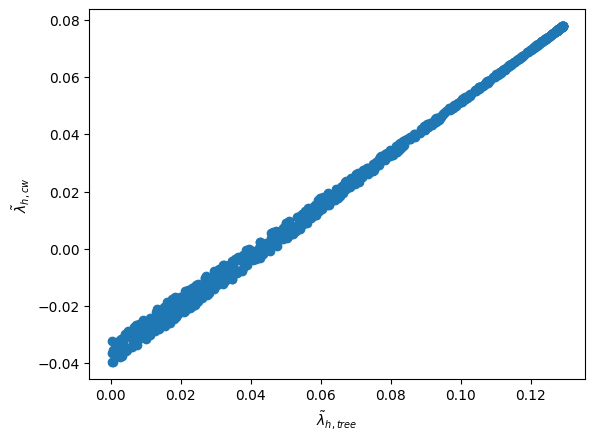

In [29]:
plt.scatter(lhtilde_tree, lhtilde_cw)
plt.xlabel(r'$\tilde{\lambda}_{h, tree}$')
plt.ylabel(r'$\tilde{\lambda}_{h, cw}$')

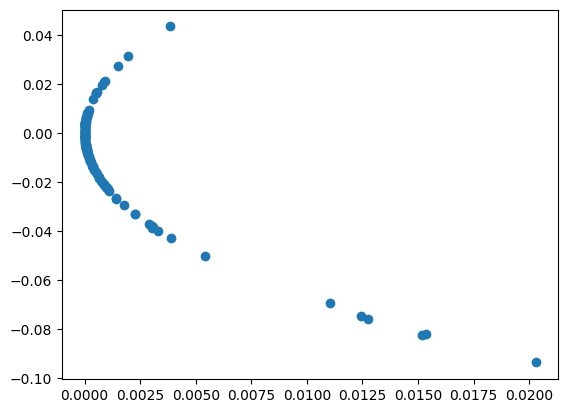

In [31]:
plt.scatter(pt_paras['l2'], pt_paras['lm'])

In [68]:
ms = 10
tanb = 0.4
sint = 0.35
mh = 125.
vew = 246.
a = mh**2 * (1-sint**2) + ms**2 * sint**2
b = mh**2 * sint**2 + ms**2 * (1-sint**2)
c = (ms**2 - mh**2) * 2*sint*(1-sint**2)**.5
lm = c / (2 * tanb * vew**2)
l1 = a / (2 * vew**2)
l2 = b / (2 * (tanb*vew)**2)
m12 = 0.25 * (2 * a + c * tanb)
m22 = -0.25 * (2 * b + c / tanb)
mod = m.model(m12, m22, l1, l2, lm, 91.1876**2)
mod.counterterm([246,0])
print(f'lh_cw : {l1 + mod.delta_lh}')
print(f'ls_cw : {l2 + mod.delta_ls}')
print(f'lsh_cw : {lm + mod.delta_lhs}')
print(f'm12_cw : {m12 + mod.delta_muh}')
print(f'm22_cw : {m22 + mod.delta_mus}')

Model initialized.
μh2 = 5843.581013786081
μs2 = 5361.673351336993
λh = 0.11338478666798864
λs = 0.10337206792418531
λsh = -0.2102775993567649
lh_cw : 0.13947422451288144
ls_cw : 0.106783857517422
lsh_cw : -0.20341603588594726
m12_cw : 7118.153830582318
m22_cw : 5125.633476270948


In [69]:
import Z2sb_model as m
mod = m.model(m12, m22, l1, l2, lm, 91.1876**2)
mod.findMinimum(X=np.array([246, 90]), T=0.0)

Model initialized.
μh2 = 5843.581013786081
μs2 = 5361.673351336993
λh = 0.11338478666798864
λs = 0.10337206792418531
λsh = -0.2102775993567649


array([246.00001879,  98.40002425])

In [5]:
a = [1,2,3]
a.extend([4,5,6])
print(a)

[1, 2, 3, 4, 5, 6]


In [48]:
import Z2_model as m
from functools import partial
from helperFunctions import a

In [52]:
mhhv_det, mshv_det, mhlv_det, mslv_det = [], [], [], []
b_det, b_det_bag = [], []
for index, i in enumerate(ind_det):
    #if index == 3:
         #continue
    mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i], pt_paras['lm'][i], pt_paras['v2re'][i])
    Vtot = partial(mod.Vtot, include_radiation=True)
    hv = np.array([pt_paras['hvtn1'][i], pt_paras['hvtn2'][i]])
    lv = np.array([pt_paras['lvtn1'][i], pt_paras['lvtn2'][i]])
    Tn = pt_paras['Tn'][i] 
    m2hv, nhv, chv = mod.boson_massSq(hv, Tn)
    m2lv, nlv, clv = mod.boson_massSq(lv, Tn)
    mhhv_det.append(abs(m2hv[0])**.5/Tn)
    mshv_det.append(abs(m2hv[1])**.5/Tn)
    mhlv_det.append(abs(m2lv[0])**.5/Tn)
    mslv_det.append(abs(m2lv[1])**.5/Tn)
    '''
    Bag model
    '''
    ap, am = mod.nt + 83.25, 83.25
    for j in range(len(m2hv)):
        if abs(m2hv[j]) / Tn**2 < 0.25:
            ap += nhv[j]
        if abs(m2lv[j]) / Tn**2 < 0.25:
            am += nlv[j]
    b_det_bag.append(am / ap)
    '''
    Real dof
    '''
    ap = a(Vtot, Tn, hv)
    am = a(Vtot, Tn, lv)
    b_det.append(am / ap)

Model initialized.
μh2 = -7806.564
μs2 = -15333.43288
λh = 0.129
λs = 1.0
λsh = 1.165560775
Model initialized.
μh2 = -7806.564
μs2 = -15099.90369
λh = 0.129
λs = 1.0
λsh = 1.016012812
Model initialized.
μh2 = -7806.564
μs2 = -14725.39713
λh = 0.129
λs = 1.0
λsh = 1.331049739
Model initialized.
μh2 = -7806.564
μs2 = -14584.64439
λh = 0.129
λs = 1.0
λsh = 0.96974631
Model initialized.
μh2 = -7806.564
μs2 = -16651.65785
λh = 0.129
λs = 1.0
λsh = 0.708991612
Model initialized.
μh2 = -7806.564
μs2 = -17493.41639
λh = 0.129
λs = 1.0
λsh = 0.985977369
Model initialized.
μh2 = -7806.564
μs2 = -15845.4649
λh = 0.129
λs = 1.0
λsh = 1.333208653
Model initialized.
μh2 = -7806.564
μs2 = -16619.87623
λh = 0.129
λs = 1.0
λsh = 0.69763142
Model initialized.
μh2 = -7806.564
μs2 = -14146.50012
λh = 0.129
λs = 1.0
λsh = 1.056621495
Model initialized.
μh2 = -7806.564
μs2 = -17179.22554
λh = 0.129
λs = 1.0
λsh = 0.937286237
Model initialized.
μh2 = -7806.564
μs2 = -16267.18397
λh = 0.129
λs = 1.0
λsh = 1.1

In [53]:
mhhv_def, mshv_def, mhlv_def, mslv_def = [], [], [], []
b_def, b_def_bag = [], []
for i in ind_def:
    mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i], pt_paras['lm'][i], pt_paras['v2re'][i])
    Vtot = partial(mod.Vtot, include_radiation=True)
    hv = np.array([pt_paras['hvtn1'][i], pt_paras['hvtn2'][i]])
    lv = np.array([pt_paras['lvtn1'][i], pt_paras['lvtn2'][i]])
    Tn = pt_paras['Tn'][i] 
    m2hv, nhv, chv = mod.boson_massSq(hv, Tn)
    m2lv, nlv, clv = mod.boson_massSq(lv, Tn)
    mhhv_def.append(abs(m2hv[0])**.5/Tn)
    mshv_def.append(abs(m2hv[1])**.5/Tn)
    mhlv_def.append(abs(m2lv[0])**.5/Tn)
    mslv_def.append(abs(m2lv[1])**.5/Tn)
    '''Bag model'''
    ap, am = mod.nt + 83.25, 83.25
    for j in range(len(m2hv)):
        if abs(m2hv[j]) / Tn**2 < 0.25:
            ap += nhv[j]
        if abs(m2lv[j]) / Tn**2 < 0.25:
            am += nlv[j]
    b_def_bag.append(am / ap)
    '''Real dof'''
    ap = a(Vtot, Tn, hv)
    am = a(Vtot, Tn, lv)
    b_def.append(am / ap)

Model initialized.
μh2 = -7806.564
μs2 = -12664.12514
λh = 0.129
λs = 1.0
λsh = 0.656376207
Model initialized.
μh2 = -7806.564
μs2 = -15916.19425
λh = 0.129
λs = 1.0
λsh = 0.690778182
Model initialized.
μh2 = -7806.564
μs2 = -16877.69933544953
λh = 0.129
λs = 1.0
λsh = 0.7087190616922012
Model initialized.
μh2 = -7806.564
μs2 = -16862.745464877135
λh = 0.129
λs = 1.0
λsh = 0.6983751534261926
Model initialized.
μh2 = -7806.564
μs2 = -13221.8261646414
λh = 0.129
λs = 1.0
λsh = 0.6937526431814792
Model initialized.
μh2 = -7806.564
μs2 = -16116.962020001274
λh = 0.129
λs = 1.0
λsh = 0.7141624397967188
Model initialized.
μh2 = -7806.564
μs2 = -16660.384024277802
λh = 0.129
λs = 1.0
λsh = 1.2552395792696356
Model initialized.
μh2 = -7806.564
μs2 = -16986.106871564712
λh = 0.129
λs = 1.0
λsh = 0.7106624297511377
Model initialized.
μh2 = -7806.564
μs2 = -12173.115715293887
λh = 0.129
λs = 1.0
λsh = 0.9728118141381721
Model initialized.
μh2 = -7806.564
μs2 = -14590.330371217766
λh = 0.129
λs = 

In [58]:
b_det.extend(data['b_det'])
b_def.extend(data['b_def'])

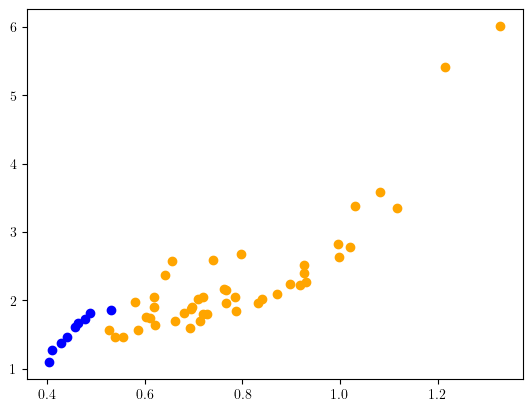

In [26]:
plt.scatter(mshv_def, mhhv_def, c='b')
plt.scatter(mshv_det, mhhv_det, c='orange')

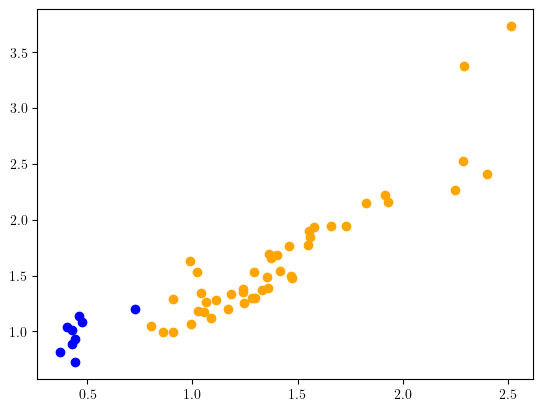

In [27]:
plt.scatter(mslv_def, mhlv_def, c='b')
plt.scatter(mslv_det, mhlv_det, c='orange')

(array([ 1.,  1.,  1.,  2.,  0.,  0.,  1.,  1.,  4.,  1.,  1.,  5.,  5.,
         7., 15., 10., 11., 24., 17., 10.]),
 array([0.88352903, 0.88864464, 0.89376025, 0.89887587, 0.90399148,
        0.90910709, 0.91422271, 0.91933832, 0.92445393, 0.92956955,
        0.93468516, 0.93980077, 0.94491639, 0.950032  , 0.95514761,
        0.96026323, 0.96537884, 0.97049445, 0.97561007, 0.98072568,
        0.98584129]),
 [<matplotlib.patches.Polygon at 0x7faf912ff8e0>])

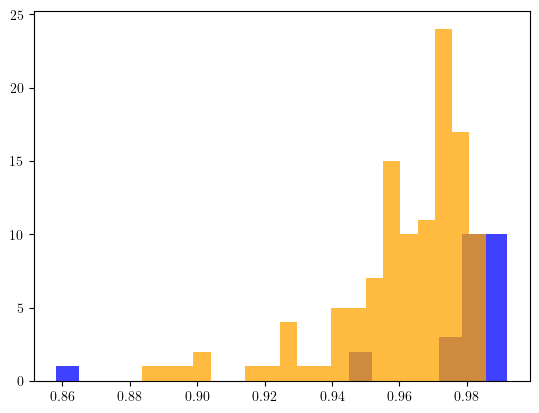

In [68]:
plt.hist(b_def, 20, histtype='stepfilled', facecolor='b', 
         alpha=0.75, label='Deflagration/Hybrid')
plt.hist(b_det, 20, histtype='stepfilled', facecolor='orange', 
         alpha=0.75, label='Detonation')

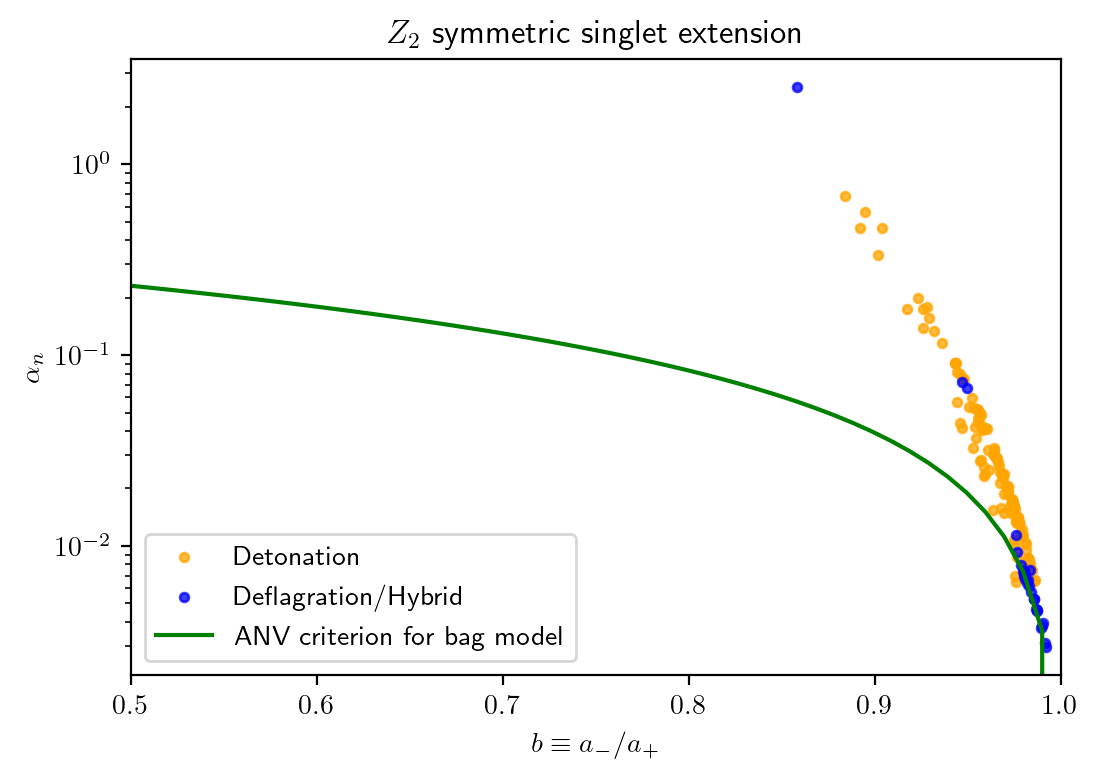

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=200)
ax.scatter(b_det, alpha_det, c='orange', s=10, alpha=0.75, label='Detonation')
ax.scatter(b_def, alpha_def, c='b', s=10, alpha=0.75, label='Deflagration/Hybrid')
y = lambda b : (1-b)*(1+4/3*np.sqrt((1-b)/6))/3
brange = np.linspace(0.5, 1.0, 50)
ax.plot(brange, y(brange), c='green', label="ANV criterion for bag model")
ax.set_xlabel(r'$b\equiv a_{-}/a_{+}$')
ax.set_ylabel(r'$\alpha_n$')
ax.set_yscale('log')
ax.set_xlim([0.5, 1.0])
ax.set_title(r'$Z_2$ symmetric singlet extension')
ax.legend(loc='lower left')

In [60]:
fig.savefig(outdir + 'alpha_b_comb12.png')

In [61]:
data = {}
data['alpha_det'] = alpha_det
data['alpha_def'] = alpha_def
data['r_det'] = rdet
data['r_def'] = rdef
data['tntc_det'] = rdet_1
data['tntc_def'] = rdef_1
data['b_det'] = b_det
data['b_def'] = b_def

In [62]:
import json
file = outdir + 'data_vw_comb12.json'
with open(file, 'w') as f:
    json.dump(data, f)

# Debug vJ

In [9]:
from scipy import integrate
from scipy import optimize
from scipy import interpolate
from helperFunctions import derivative, alpha_p, cs_sq, dYdtau, dvTdxi, r_func, μ, ω, p, e, s, find_vw_ds
from functools import partial

In [10]:
import scipy as sp
print(sp.__version__)

1.10.0


In [11]:
from helperFunctions import vJ
def test_vJ(vw, mod):
    Tnuc, hv, lv = mod.Tn, mod.hvev, mod.Tnvev
    Vtot = partial(mod.Vtot, include_radiation=True)
    gsol=optimize.fsolve(lambda x:match(vw, x[0], Tnuc, x[1], hv, lv, Vtot),[vw*0.9,Tnuc+2])
    return vJ(alpha_p(Vtot, Tnuc, gsol[1], hv, lv))

def match(vp,vm,Tp,Tm, high_vev, low_vev, Vtot):
    r = r_func(Vtot, Tp, Tm, high_vev, low_vev)
    αp = alpha_p(Vtot, Tp, Tm, high_vev, low_vev)
    vpvm = 1-(1-3*αp)*r
    vpvm = vpvm/(3-3*(1+αp)*r)
    ratio = 3 + (1-3*αp)*r
    ratio = ratio/(1+3*(1+αp)*r)
    return [vp*vm - vpvm, vp/vm - ratio]

In [12]:
import Z2_model as m

In [13]:
i = ind_det[rdet.index(min(rdet))]
mod = m.model(pt_paras['m12'][i], pt_paras['m22'][i], pt_paras['l1'][i], pt_paras['l2'][i], pt_paras['lm'][i], pt_paras['v2re'][i])

Model initialized.
μh2 = -7806.564
μs2 = -16619.87623
λh = 0.129
λs = 1.0
λsh = 0.69763142


In [14]:
pt_paras['alpha'][i]

0.006487497

In [15]:
mod.hvev = np.array([pt_paras['hvtn1'][i], pt_paras['hvtn2'][i]])
mod.Tnvev = np.array([pt_paras['lvtn1'][i], pt_paras['lvtn2'][i]])
mod.Tn = pt_paras['Tn'][i]

In [16]:
i

17

In [21]:
vwlist = np.linspace(0.66, 0.67, 50)
vjlist = []
for vw in vwlist:
    vjlist.append(test_vJ(vw, mod))

/Users/tongou/miniconda3/envs/py3-10-9/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0, 0.5, '$v_J$')

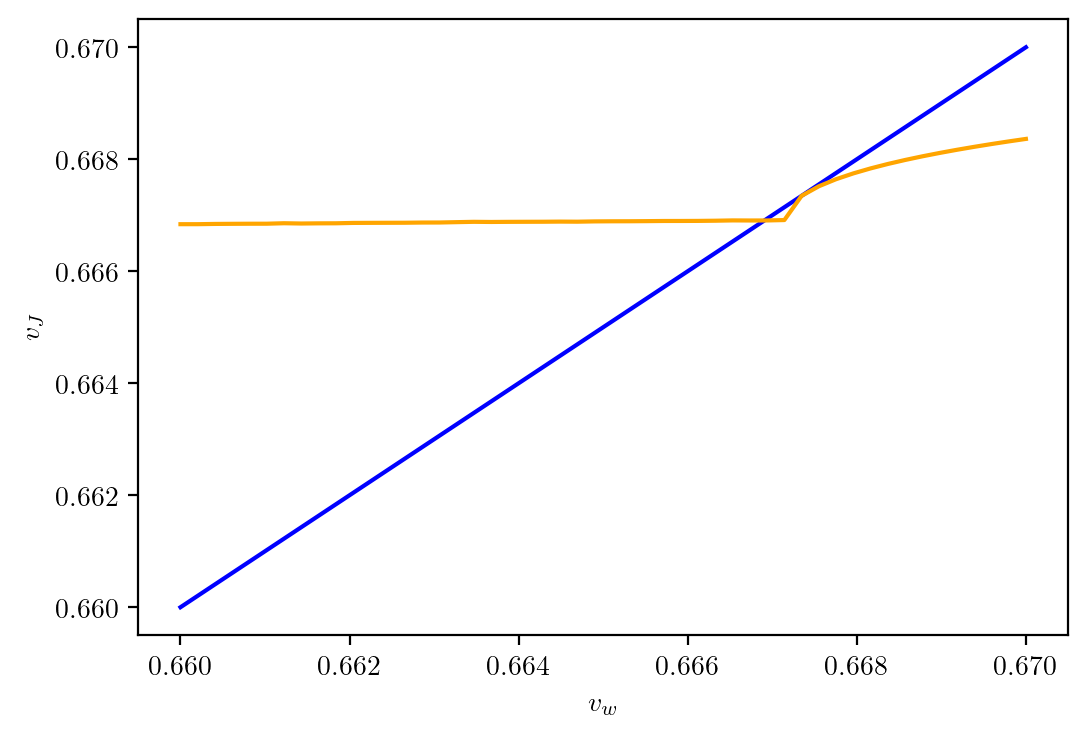

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=200)
ax.plot(vwlist, vwlist, c='b')
ax.plot(vwlist, vjlist, c='orange')
ax.set_xlabel(r'$v_w$')
ax.set_ylabel(r'$v_J$')

In [25]:
fig.savefig(outdir + 'vw_vj_17.png')

In [141]:
vwmax = 1.0
eps = 0.001
for j in range(1000):
    vw = vwmax - j*eps
    if test_vJ(vw, mod) > vw:
        vwmin = vw
        break
print(vwmin)

0.635


In [125]:
vJvalue = optimize.brentq(lambda vw:test_vJ(vw, mod) - vw, vwmin, 0.6365, xtol=1e-6)

ValueError: f(a) and f(b) must have different signs

In [127]:
vJvalue

0.6350865825011688

In [126]:
def det_bc(vp, Tp, vmguess, Tmguess, mod):
    hv, lv, Vtot = mod.hvev, mod.Tnvev, partial(mod.Vtot, include_radiation=True)
    vm,Tm =optimize.fsolve(lambda x:match(vp, x[0], Tp, x[1], hv, lv, Vtot), [vmguess, Tmguess])
    try:    
        ds = s(vp, Tp) - s(vm, Tm)
    except:
        print('Invalid ds')
        return vm, Tm, None
    return vm, Tm, ds

In [128]:
vm, Tm, dsJ = det_bc(vJvalue, mod.Tn, vJvalue*0.7, mod.Tn+2, mod)
print(dsJ)

0.04623815275348875


In [60]:
(18+(20+16)/8)/233*299.99+13

41.96899141630901

In [61]:
36/8

4.5